In [1]:
import corner
import numpy as np
import os

from pathlib import Path

from spectrumpy import Spectrum


%load_ext autoreload
%autoreload 2
#%matplotlib inline
%matplotlib ipympl

cwd = Path(os.getcwd())

figsize_sbs = (14, 7)

# Spectral lamps calibration

In [2]:
sp_lamps_folder = cwd.joinpath('data/')
ext = '_ATIK.fit'

lamps_path = [l for l in sp_lamps_folder.glob(f'*{ext}')]
names = [l.name.split(f'{ext}')[0] for l in lamps_path]

lamps = {n: l for n, l in zip(names, lamps_path)}

In [3]:
lamps

{'neon': PosixPath('/home/daniele/Documenti/spectrumpy/data/neon_ATIK.fit'),
 'hydrogen': PosixPath('/home/daniele/Documenti/spectrumpy/data/hydrogen_ATIK.fit'),
 'nitrogen': PosixPath('/home/daniele/Documenti/spectrumpy/data/nitrogen_ATIK.fit'),
 'oxygen': PosixPath('/home/daniele/Documenti/spectrumpy/data/oxygen_ATIK.fit'),
 'CO2': PosixPath('/home/daniele/Documenti/spectrumpy/data/CO2_ATIK.fit'),
 'argon': PosixPath('/home/daniele/Documenti/spectrumpy/data/argon_ATIK.fit')}

In [4]:
hydr = Spectrum(lamps['neon'],
                lamps['hydrogen'])

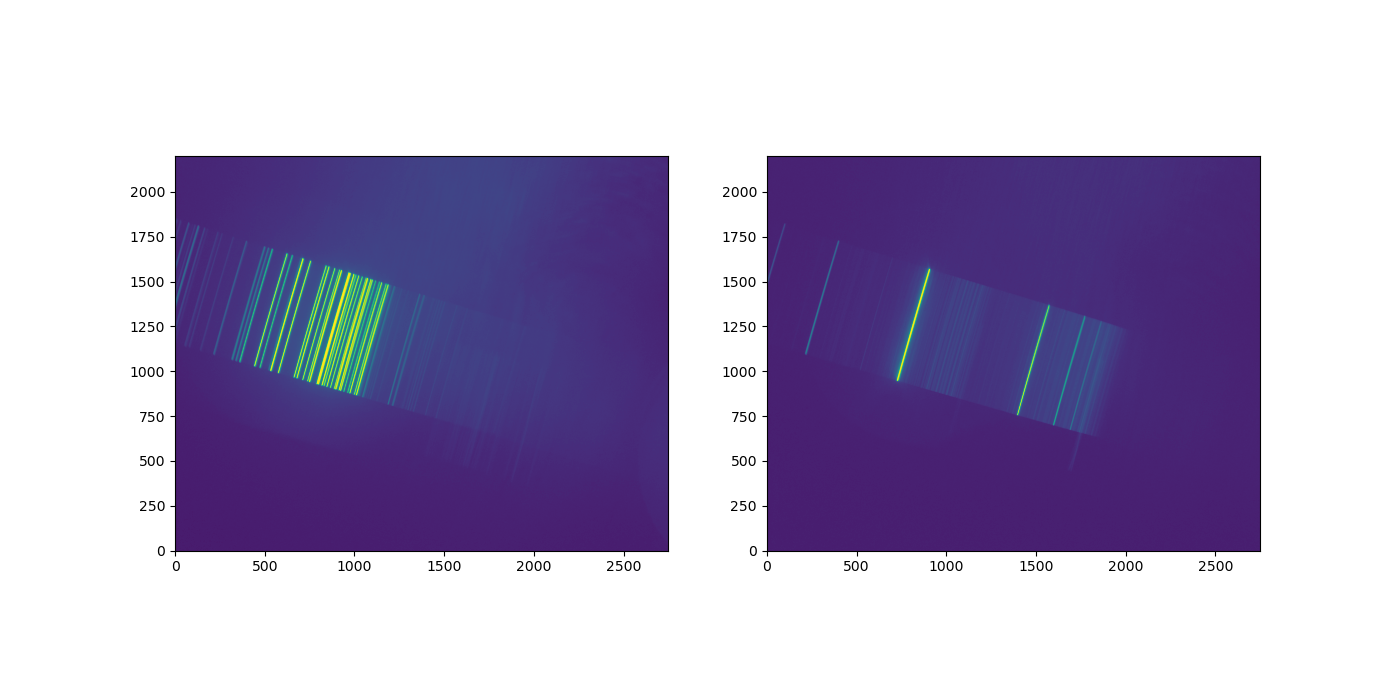

In [5]:
hydr.show_base_image(figsize=figsize_sbs)

In [6]:
x = [214, 723, 1392, 1593, 1686]
y = [1095, 947, 756, 700, 674]
sx = [4, 4, 3, 3, 2]
sy = [4, 2, 2, 2, 1]

In [7]:
post = hydr.find_rotation_angle(x, y, sy, sx, bounds=[[-0.4, -0.1], [1100, 1200]])

(NestedSampler pid=14046) 
(NestedSampler pid=14046) 
CPNEST: populate samplers: 100%|██████████| 1000/1000 [00:00<00:00, 39239.44it/s]
(NestedSampler pid=14040) 
CPNEST: populate samplers: 100%|██████████| 1000/1000 [00:00<00:00, 36130.07it/s]


KeyboardInterrupt: 

In [ ]:
samples = np.column_stack([post['E(B-V)'], post['age']])
fig = corner.corner(samples, labels=['E(B-V) [mag]', 'age [Myr]'], quantiles=[.05, .95],
                    filename='./joint_test.pdf', show_titles=True, title_fmt='.3e',
                    title_kwargs={'fontsize': 8},
                    label_kwargs={'fontsize': 8},
                    use_math_text=True)
fig.savefig('joint_test.pdf')

In [ ]:
moon_fits_path = cwd.joinpath('data/alpy_spectra_repository-20210417T142007Z-001/alpy_spectra_repository/27 marzo 2018/')


moon_path = moon_fits_path.joinpath('moon-001.fit')
moon_lamp_path = moon_fits_path.joinpath('lamp_moon_venus.fit')

In [12]:
moon = Spectrum(moon_path, moon_lamp_path)

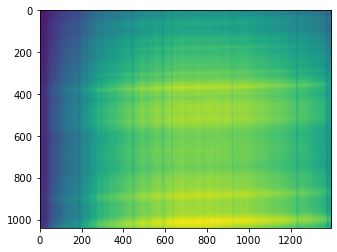

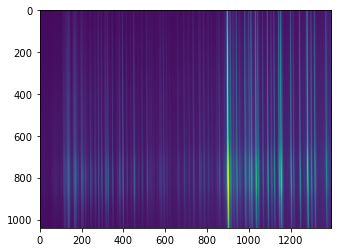

In [13]:
moon.show_base_image()

In [14]:
moon.run_integration()

In [15]:
moon.smooth(50)


fit ord	:	1
par0	:	2.1659437760758116 +- 0.02301981967590811
par1	:	3915.4722122925696 +- 25.221167178207356
cov	:	[[ 5.29912098e-04 -5.75749492e-01]
 [-5.75749492e-01  6.36107274e+02]]
chi2_R	:	0.10691951103198295
dof	:	2
p-value	:	0.8985979973050771



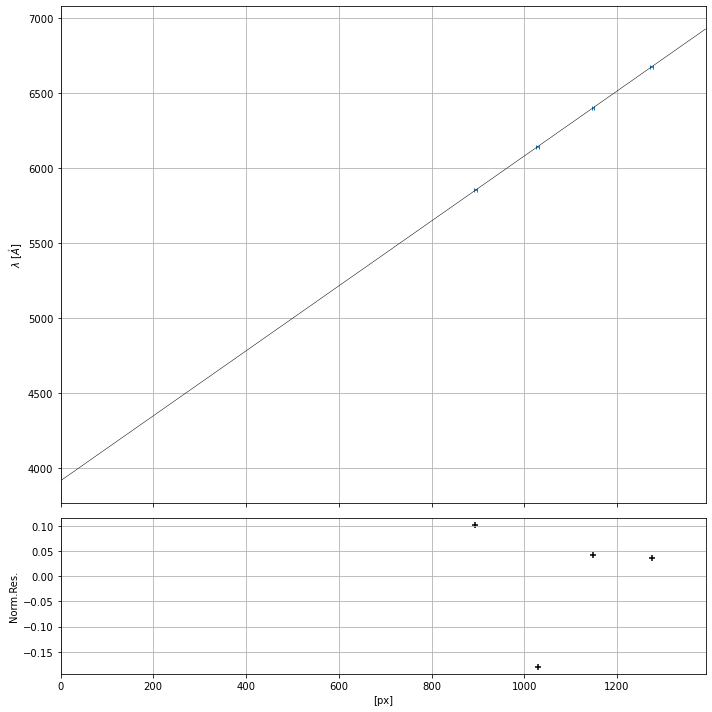

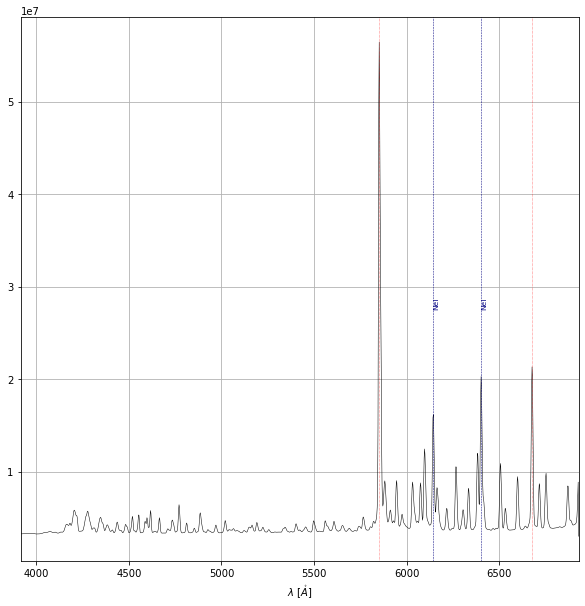

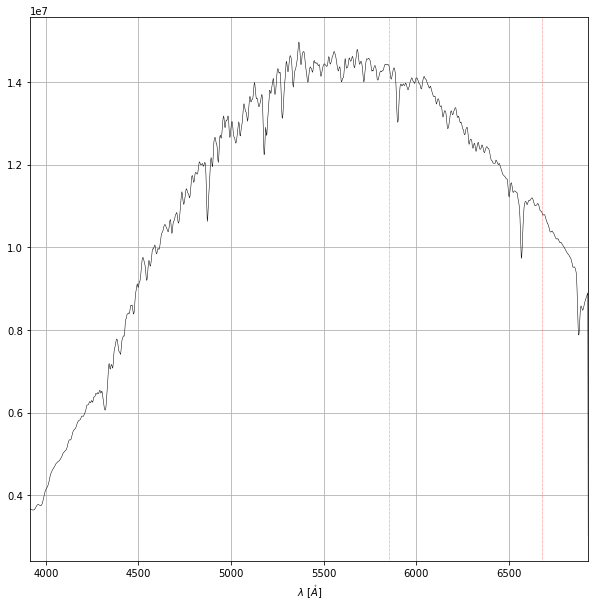

In [17]:
lin = np.array([5852.4878, 6143.0627, 6402.2480, 6677.282])
px = np.array([894, 1029, 1148, 1275])
err = np.array([3, 3, 3, 3])
names = np.array(['NeI', 'NeI', 'NeI', 'ArI'])

moon.assign_dataset(lin, px, err, names)

print(moon.run_calibration(1, 'ls'))
moon.show_calibration(figsize=(10, 10))